In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 


%matplotlib inline
import matplotlib.pyplot as plt
#pd.set_option("max_rows",2000)
#pd.set_option("max_columns",2000)

In [3]:
#read in Ambulance main data
df = pd.read_excel(r"Ambulance_Patient_Database_09Oct20 (1).xlsx")

In [4]:
df_check = df[["LGA", "Rate per 10,000", "Rate per 10,000.1"]]
df_check

,LGA,"Rate per 10,000","Rate per 10,000.1"
0,Alpine (S),0.000000,0.000000
1,Ararat (RC),17.486114,0.000000
2,Ballarat (C),4.445697,119.634061
3,Banyule (C),6.461528,0.000000
4,Bass Coast (S),2.768645,0.000000
...,...,...,...
74,Wodonga (C),12.666066,0.000000
75,Wyndham (C),24.359537,75.282309
76,Yarra (C),10.193154,0.000000
77,Yarra Ranges (S),5.661500,61.491161


In [5]:
#read in generated Clusters 
cluster = pd.read_excel("Call rate per cluster - LGA - 4Nov20.xlsx", header=1, skiprows=[2])

In [6]:
#rename columns for join etc
cluster = cluster.rename(columns = {'Residence Lga Name': 'LGA', "0" : "Cluster 0","1" : "Cluster 1","2" : "Cluster 2","3" : "Cluster 3", "4" : "Cluster 4"  })

In [7]:
cluster

,LGA,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Alpine (S),0.290473,0.194204,0.324450,0.115256,0.075616
1,Ararat (RC),0.372214,0.160305,0.313893,0.072061,0.081527
2,Ballarat (C),0.438321,0.136288,0.228181,0.115711,0.081498
3,Banyule (C),0.424799,0.151386,0.239901,0.110771,0.073143
4,Bass Coast (S),0.365297,0.133945,0.273235,0.163941,0.063582
...,...,...,...,...,...,...
75,Wodonga (C),0.405974,0.150034,0.269809,0.089807,0.084376
76,Wyndham (C),0.436922,0.142729,0.198603,0.103548,0.118198
77,Yarra (C),0.391794,0.135509,0.236197,0.123029,0.113472
78,Yarra Ranges (S),0.407115,0.132681,0.252268,0.123923,0.084014


In [8]:
#Removing Row called Unincorporated Vic
cluster = cluster.drop(cluster.index[-12])

In [9]:
#correcting name in dataframe to match main 
cluster.at[34, 'LGA'] = 'Kingston (C)'
cluster.at[36, 'LGA'] = 'Latrobe (C)'

In [10]:
cluster

,LGA,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Alpine (S),0.290473,0.194204,0.324450,0.115256,0.075616
1,Ararat (RC),0.372214,0.160305,0.313893,0.072061,0.081527
2,Ballarat (C),0.438321,0.136288,0.228181,0.115711,0.081498
3,Banyule (C),0.424799,0.151386,0.239901,0.110771,0.073143
4,Bass Coast (S),0.365297,0.133945,0.273235,0.163941,0.063582
...,...,...,...,...,...,...
75,Wodonga (C),0.405974,0.150034,0.269809,0.089807,0.084376
76,Wyndham (C),0.436922,0.142729,0.198603,0.103548,0.118198
77,Yarra (C),0.391794,0.135509,0.236197,0.123029,0.113472
78,Yarra Ranges (S),0.407115,0.132681,0.252268,0.123923,0.084014


In [11]:
#Merge Clusters on to new Dataframe 
dfc = pd.merge(df, cluster, on="LGA", how="left")

In [12]:
#Create List of columns to split up % columns from Numeric 
col = df.columns.values.tolist()
col_df = pd.DataFrame({"col" : df.columns}).astype(str)


In [13]:
#emtpy variables for later 
col_n = []
col_np = []

In [14]:
#String match variable
var = r"%"

In [15]:
#Indentify columns names 
conditions = [col_df.col.str.contains(var, case=False)]
additions = ["percent"]
col_df['spliter'] = np.select(conditions, additions, default='number')

In [16]:
#Split into to list of columns 
col_as_per = col_df.loc[(col_df["spliter"]=='percent')]
col_as_num = col_df.loc[(col_df["spliter"]=='number')]

In [17]:
col_p = col_as_per["col"].tolist()
col_n = col_as_num["col"].tolist()

In [18]:
#Wrapped each line in quotes to add to new DF columns list 
col_n = ','.join('"{0}"'.format(l) for l in col_n)

In [19]:
#if Printed this will return correct string with Quotes 
col_n = str(col_n)[0::]

In [20]:
#New DataFrame 
number_df = dfc[["Code",
                "LGA","0-4 years (no)","5-9 years (no)","10-14 years (no)","15-19 years (no)",
                "20-24 years (no)","25-29 years (no)","30-34 years (no)","35-39 years (no)",
                "40-44 years (no)","45-49 years (no)","50-54 years (no)","55-59 years (no)",
                "60-64 years (no)","65-69 years (no)","70-74 years (no)","75-79 years (no)",
                "80-84 years (no)","85+ years (no)","Total population",
                "Households in dwellings receiving rent assistance from the Australian Government",
                "Total dwellings",
                "Aboriginal households in dwellings receiving rent assistance from the Australian Government",
                "Total dwellings with Aboriginal households","Social housing (rented) dwellings",
                "Total private dwellings","Privately rented dwellings","Total private dwellings.1",
                "Persons living in social housing","Total persons in private dwellings",
                "Persons living in privately rented dwellings","Total persons in private dwellings.1",
                "Mortgaged private dwellings","Rented private dwellings","Total low income households",
                "Total private dwellings.2","No. of dwellings with households requiring extra bedrooms",
                "Total private dwellings ","Private dwellings with no motor vehicle",
                "Total private dwellings.3","Persons living in crowded dwellings",
                "Total persons in private dwellings.2","Persons living in severely crowded dwellings",
                "Total persons in private dwellings.3","Rate per 10,000",
                "Aboriginal persons living in crowded dwellings",
                "Total Aboriginal persons in private dwellings",
                "Aboriginal persons living in severely crowded dwellings",
                "Total Aboriginal persons in private dwellings.1","Rate per 10,000.1",
                "Estimated number of people aged 15 years and over with fair or poor self-assessed health (modelled estimates) (Number)",
                "Estimated number of people aged 15 years and over with fair or poor self-assessed health (modelled estimates) (ASR per 100)",
                "Estimated number of people with diabetes mellitus\n (modelled estimates) (Number)",
                "Estimated number of people with diabetes mellitus\n (modelled estimates) (ASR per 100)",
                "Estimated number of people with mental and behavioural problems\n (modelled estimates) (Number)",
                "Estimated number of people with mental and behavioural problems\n (modelled estimates) (ASR per 100)",
                "Estimated number of people with heart, stroke and vascular disease\n (modelled estimates) (Number)",
                "Estimated number of people with heart, stroke and vascular disease\n (modelled estimates) (ASR per 100)",
                "Estimated number of people aged 18 years and over with high or very high psychological distress, based on the Kessler 10 Scale (K10)\n (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over with high or very high psychological distress, based on the Kessler 10 Scale (K10)\n (modelled estimates) (ASR per 100)",
                "Estimated number of people aged 18 years and over who had high blood pressure  (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over who had high blood pressure  (modelled estimates) (ASR per 100)","Estimated number of people aged 18 years and over who were overweight (but not obese)  (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over who were overweight (but not obese)  (modelled estimates) (ASR per 100)","Estimated number of people aged 18 years and over who were obese\n (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over who were obese\n (modelled estimates) (ASR per 100)","Estimated number of people aged 18 years and over who were current smokers (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over who were current smokers (modelled estimates) (ASR per 100)","Estimated number of people aged 18 years and over who consumed more than two standard alcoholic drinks per day on average (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over who consumed more than two standard alcoholic drinks per day on average (modelled estimates) (ASR per 100)",
                "Estimated number of people aged 18 years and over with adequate fruit intake (modelled estimates) (Number)",
                "Estimated number of people aged 18 years and over with adequate fruit intake (modelled estimates) (ASR per 100)",
                "Estimated population, aged 18 years and over, who undertook low, very low or no exercise in the previous week (modelled estimates) (Number)",
                "Estimated population, aged 18 years and over, who undertook low, very low or no exercise in the previous week (modelled estimates) (ASR per 100)",
                "Total admissions (excluding same-day admissions for renal dialysis) - \nPublic hospitals (Number)",
                "Total admissions (excluding same-day admissions for renal dialysis) - \nPublic hospitals (ASR per 100,000)",
                "Total admissions (excluding same-day admissions for renal dialysis) - \nPrivate hospitals (Number)",
                "Total admissions (excluding same-day admissions for renal dialysis) - \nPrivate hospitals (ASR per 100,000)"
                ,"Total admissions (excluding same-day admissions for renal dialysis) - \nAll hospitals (Number)",
                "Total admissions (excluding same-day admissions for renal dialysis) - \nAll hospitals (ASR per 100,000)",
                "Admissions for all cancers, persons \n- Public hospitals (Number)",
                "Admissions for all cancers, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for all cancers, persons \n- All hospitals (Number)",
                "Admissions for all cancers, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for endocrine, nutritional and metabolic diseases, persons \n- Public hospitals (Number)",
                "Admissions for endocrine, nutritional and metabolic diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for endocrine, nutritional and metabolic diseases, persons \n- All hospitals (Number)",
                "Admissions for endocrine, nutritional and metabolic diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for diabetes, persons\n- Public hospitals (Number)",
                "Admissions for diabetes, persons\n- Public hospitals (ASR per 100,00)",
                "Admissions for diabetes, persons \n- All hospitals (Number)",
                "Admissions for diabetes, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for mental health related conditions, persons \n- Public hospitals (Number)",
                "Admissions for mental health related conditions, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for mental health related conditions, persons \n- All hospitals (Number)",
                "Admissions for mental health related conditions, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for mood affective disorders, persons \n- Public hospitals (Number)",
                "Admissions for mood affective disorders, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for mood affective disorders, persons \n- All hospitals (Number)",
                "Admissions for mood affective disorders, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for nervous system diseases, persons \n- Public hospitals (Number)",
                "Admissions for nervous system diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for nervous system diseases, persons \n- All hospitals (Number)",
                "Admissions for nervous system diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for eye and adnexa diseases, persons\n- Public hospitals (Number)",
                "Admissions for eye and adnexa diseases, persons\n- Public hospitals (ASR per 100,00)",
                "Admissions for eye and adnexa diseases, persons \n- All hospitals (Number)",
                "Admissions for eye and adnexa diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for ear and mastoid process diseases, persons \n- Public hospitals (Number)",
                "Admissions for ear and mastoid process diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for ear and mastoid process diseases, persons \n- All hospitals (Number)",
                "Admissions for ear and mastoid process diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for circulatory system diseases, persons \n- Public hospitals (Number)",
                "Admissions for circulatory system diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for circulatory system diseases, persons \n- All hospitals (Number)",
                "Admissions for circulatory system diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for ischaemic heart disease, persons \n- Public hospitals (Number)",
                "Admissions for ischaemic heart disease, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for ischaemic heart disease, persons \n- All hospitals (Number)",
                "Admissions for ischaemic heart disease, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for heart failure, persons \n- Public hospitals (Number)",
                "Admissions for heart failure, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for heart failure, persons \n- All hospitals (Number)",
                "Admissions for heart failure, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for stroke, persons \n- Public hospitals (Number)",
                "Admissions for stroke, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for stroke, persons \n- All hospitals (Number)",
                "Admissions for stroke, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for respiratory system diseases, persons \n- Public hospitals (Number)",
                "Admissions for respiratory system diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for respiratory system diseases, persons \n- All hospitals (Number)",
                "Admissions for respiratory system diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for asthma, persons\n- Public hospitals (Number)",
                "Admissions for asthma, persons\n- Public hospitals (ASR per 100,00)",
                "Admissions for asthma, persons \n- All hospitals (Number)",
                "Admissions for asthma, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for Chronic Obstructive Pulmonary Disease (COPD), persons \n- Public hospitals (Number)",
                "Admissions for Chronic Obstructive Pulmonary Disease (COPD), persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for Chronic Obstructive Pulmonary Disease (COPD), persons \n- All hospitals (Number)",
                "Admissions for Chronic Obstructive Pulmonary Disease (COPD), persons \n- All hospitals (ASR per 100,00)",
                "Admissions for digestive system diseases, persons \n- Public hospitals (Number)",
                "Admissions for digestive system diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for digestive system diseases, persons \n- All hospitals (Number)",
                "Admissions for digestive system diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for skin and subcutaneous tissue diseases, persons \n- Public hospitals (Number)",
                "Admissions for skin and subcutaneous tissue diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for skin and subcutaneous tissue diseases, persons \n- All hospitals (Number)",
                "Admissions for skin and subcutaneous tissue diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for musculoskeletal system and connective tissue diseases, persons \n- Public hospitals (Number)",
                "Admissions for musculoskeletal system and connective tissue diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for musculoskeletal system and connective tissue diseases, persons \n- All hospitals (Number)",
                "Admissions for musculoskeletal system and connective tissue diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for genitourinary system diseases, persons \n- Public hospitals (Number)",
                "Admissions for genitourinary system diseases, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for genitourinary system diseases, persons \n- All hospitals (Number)",
                "Admissions for genitourinary system diseases, persons \n- All hospitals (ASR per 100,00)",
                "Admissions for chronic kidney disease, persons \n- Public hospitals (Number)",
                "Admissions for chronic kidney disease, persons \n- Public hospitals (ASR per 100,00)",
                "Admissions for chronic kidney disease, persons \n- All hospitals (Number)",
                "Admissions for chronic kidney disease, persons \n- All hospitals (ASR per 100,00)",
               "Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"]]



In [21]:
#checking for null values
number_df.isna().sum()


Code                0
LGA                 0
0-4 years (no)      0
5-9 years (no)      0
10-14 years (no)    0
                   ..
Cluster 0           0
Cluster 1           0
Cluster 2           0
Cluster 3           0
Cluster 4           0
Length: 166, dtype: int64

In [22]:
#replacing null value of # for zero
number_df.replace("#", 0, inplace=True)
number_df.replace("..", 0, inplace=True)

/opt/anaconda3/envs/PythonAdvanced/lib/python3.7/site-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
lga_df = number_df.groupby(["LGA"]).sum()

In [24]:
lga_df

,Code,0-4 years (no),5-9 years (no),10-14 years (no),15-19 years (no),20-24 years (no),25-29 years (no),30-34 years (no),35-39 years (no),40-44 years (no),...,"Admissions for genitourinary system diseases, persons \n- All hospitals (ASR per 100,00)","Admissions for chronic kidney disease, persons \n- Public hospitals (Number)","Admissions for chronic kidney disease, persons \n- Public hospitals (ASR per 100,00)","Admissions for chronic kidney disease, persons \n- All hospitals (Number)","Admissions for chronic kidney disease, persons \n- All hospitals (ASR per 100,00)",Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
LGA,,,,,,,,,,,,,,,,,,,,,
Alpine (S),20110,558,675,849,683,525,528,572,655,704,...,1802.329158,28.745354,203.222670,0.000000,0.000000,0.290473,0.194204,0.324450,0.115256,0.075616
Ararat (RC),20260,604,617,680,585,551,660,603,703,694,...,2032.837270,15.367134,119.121638,0.000000,0.000000,0.372214,0.160305,0.313893,0.072061,0.081527
Ballarat (C),20570,6910,7237,7035,6571,8360,8159,7128,6806,6433,...,2366.430656,212.065038,197.119204,245.972576,226.832549,0.438321,0.136288,0.228181,0.115711,0.081498
Banyule (C),20660,7993,8487,7628,7056,8362,9077,9309,9484,9117,...,2401.656078,207.000000,156.398359,277.000000,206.206341,0.424799,0.151386,0.239901,0.110771,0.073143
Bass Coast (S),20740,1865,2083,2040,1829,1267,1562,1811,1874,1818,...,2226.848688,69.272566,175.241306,79.280955,180.969919,0.365297,0.133945,0.273235,0.163941,0.063582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga (C),27170,2905,3035,2848,2704,2888,3118,3075,2542,2403,...,2084.274992,46.000000,113.494343,0.000000,0.000000,0.405974,0.150034,0.269809,0.089807,0.084376
Wyndham (C),27260,25998,24668,18640,15164,16947,20733,28339,28474,20199,...,1998.794185,411.198720,188.471417,420.198720,213.641031,0.436922,0.142729,0.198603,0.103548,0.118198
Yarra (C),27350,4556,3488,2916,3064,8255,16674,15284,9801,6532,...,1736.222640,119.082006,128.677296,142.890206,165.819455,0.391794,0.135509,0.236197,0.123029,0.113472


In [28]:
#breakdown and review of severity of calls identiy code 1 (high severity) and 2 (low severity)
codesraw_df = pd.read_csv('LGA-Response-Time-Performance-FY-2019.csv')
codesraw_df['Total Number'] = codesraw_df['Total Number'].str.replace(',', '')

In [29]:
codesraw_df = codesraw_df[["LGA Name", "Total Number"]]
codesraw_df = codesraw_df.rename(columns = {'LGA Name': 'LGA'}).copy()

In [30]:
codes_1 = codesraw_df.loc[0:79,:].copy()
codes_2 = codesraw_df.loc[89:168,:].copy()

In [31]:
codes_1

,LGA,Total Number
0,Alpine,573
1,Ararat,588
2,Ballarat,6051
3,Banyule,5415
4,Bass Coast,2325
...,...,...
75,Wodonga,2220
76,Wyndham,8515
77,Yarra,4611
78,Yarra Ranges,6722


In [32]:
codes_1["Total Number"] = pd.to_numeric(codes_1["Total Number"], errors="coerce")
codes_2["Total Number"] = pd.to_numeric(codes_2["Total Number"], errors="coerce")

In [33]:
codes_1

,LGA,Total Number
0,Alpine,573
1,Ararat,588
2,Ballarat,6051
3,Banyule,5415
4,Bass Coast,2325
...,...,...
75,Wodonga,2220
76,Wyndham,8515
77,Yarra,4611
78,Yarra Ranges,6722


In [34]:
codes_2.index[-12]
codes_2.reset_index(drop=True, inplace=True)

In [35]:
codes_1 = codes_1.drop(codes_1.index[-12])
codes_2 = codes_2.drop(codes_2.index[-12])


In [36]:
codes_1 = codes_1.rename(columns = {'Total Number': 'Code 1'}).copy()
codes_2 = codes_2.rename(columns = {'Total Number': 'code 2'}).copy()

In [37]:
codes_1["LGA"] = cluster["LGA"]
codes_2["LGA"] = cluster["LGA"]

In [38]:
print(len(codes_1["LGA"]))
print(len(codes_2["LGA"]))
print(len(number_df["LGA"]))

79
79
79


In [39]:
codes_1

,LGA,Code 1
0,Alpine (S),573
1,Ararat (RC),588
2,Ballarat (C),6051
3,Banyule (C),5415
4,Bass Coast (S),2325
...,...,...
75,Wodonga (C),2220
76,Wyndham (C),8515
77,Yarra (C),4611
78,Yarra Ranges (S),6722


In [ ]:
#Review of customer Clusters 

In [40]:
cluster

,LGA,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,Alpine (S),0.290473,0.194204,0.324450,0.115256,0.075616
1,Ararat (RC),0.372214,0.160305,0.313893,0.072061,0.081527
2,Ballarat (C),0.438321,0.136288,0.228181,0.115711,0.081498
3,Banyule (C),0.424799,0.151386,0.239901,0.110771,0.073143
4,Bass Coast (S),0.365297,0.133945,0.273235,0.163941,0.063582
...,...,...,...,...,...,...
75,Wodonga (C),0.405974,0.150034,0.269809,0.089807,0.084376
76,Wyndham (C),0.436922,0.142729,0.198603,0.103548,0.118198
77,Yarra (C),0.391794,0.135509,0.236197,0.123029,0.113472
78,Yarra Ranges (S),0.407115,0.132681,0.252268,0.123923,0.084014


In [41]:
rate_df = number_df[["LGA"]] 
rate_df = pd.merge(rate_df, cluster, on="LGA", how="left")
rate_df = pd.merge(rate_df, codes_1, on="LGA", how="left")
rate_df = pd.merge(rate_df, codes_2, on="LGA", how="left")

In [42]:
rate_df["Total Admis"] = \
number_df[["Total admissions (excluding same-day admissions for renal dialysis) - \nAll hospitals (Number)"]]

In [43]:
rate_df["Total Pop"] = number_df[["Total population"]]

In [44]:
rate_df["Admis_rate"] = rate_df["Total Admis"] / rate_df["Total Pop"]


In [45]:
rate_df["Code 1"] = pd.to_numeric(rate_df["Code 1"])
rate_df["code 2"] = pd.to_numeric(rate_df["code 2"])

(array([ 1.,  1.,  1.,  5., 14., 20., 14., 15.,  5.,  3.]),
 array([0.17239384, 0.21425342, 0.25611299, 0.29797257, 0.33983214,
        0.38169171, 0.42355129, 0.46541086, 0.50727044, 0.54913001,
        0.59098959]),
 <BarContainer object of 10 artists>)

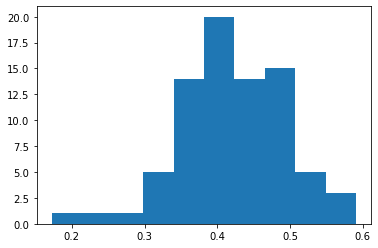

In [46]:
plt.hist(rate_df['Admis_rate'])

In [47]:
rate_df["Admis_rate"].describe()

count    79.000000
mean      0.421489
std       0.070590
min       0.172394
25%       0.378231
50%       0.419970
75%       0.470838
max       0.590990
Name: Admis_rate, dtype: float64

In [48]:
naive_df = rate_df[["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Code 1","code 2","Total Admis","Total Pop","Admis_rate"]]


In [49]:
#?pd.qcut

In [50]:
bins = [1,2,3,4,5]
naive_df["Admins Bins"] = pd.qcut(naive_df["Admis_rate"], q=5, labels=bins)

In [51]:
naive_df["Admins Bins"].unique()


[4, 5, 2, 1, 3]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [52]:
naive_df[["Admins Bins","Admis_rate"]]

,Admins Bins,Admis_rate
0,4,0.451392
1,4,0.469585
2,4,0.441288
3,5,0.480312
4,4,0.475271
...,...,...
74,4,0.438348
75,1,0.254544
76,1,0.292841
77,3,0.424018


In [53]:
naive_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Code 1,code 2,Total Admis,Total Pop,Admis_rate,Admins Bins
0,0.290473,0.194204,0.324450,0.115256,0.075616,573,657,5784.133,12814,0.451392,4
1,0.372214,0.160305,0.313893,0.072061,0.081527,588,529,5562.230,11845,0.469585,4
2,0.438321,0.136288,0.228181,0.115711,0.081498,6051,4301,48323.270,109505,0.441288,4
3,0.424799,0.151386,0.239901,0.110771,0.073143,5415,3972,63224.000,131631,0.480312,5
4,0.365297,0.133945,0.273235,0.163941,0.063582,2325,1983,17261.860,36320,0.475271,4
...,...,...,...,...,...,...,...,...,...,...,...
74,0.405974,0.150034,0.269809,0.089807,0.084376,2220,1561,18447.000,42083,0.438348,4
75,0.436922,0.142729,0.198603,0.103548,0.118198,8515,6012,68850.810,270487,0.254544,1
76,0.391794,0.135509,0.236197,0.123029,0.113472,4611,3445,29721.880,101495,0.292841,1
77,0.407115,0.132681,0.252268,0.123923,0.084014,6722,4719,67614.800,159462,0.424018,3


In [54]:
naive_df.drop("Admis_rate",axis='columns', inplace=True)

In [55]:
naive_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Code 1,code 2,Total Admis,Total Pop,Admins Bins
0,0.290473,0.194204,0.324450,0.115256,0.075616,573,657,5784.133,12814,4
1,0.372214,0.160305,0.313893,0.072061,0.081527,588,529,5562.230,11845,4
2,0.438321,0.136288,0.228181,0.115711,0.081498,6051,4301,48323.270,109505,4
3,0.424799,0.151386,0.239901,0.110771,0.073143,5415,3972,63224.000,131631,5
4,0.365297,0.133945,0.273235,0.163941,0.063582,2325,1983,17261.860,36320,4
...,...,...,...,...,...,...,...,...,...,...
74,0.405974,0.150034,0.269809,0.089807,0.084376,2220,1561,18447.000,42083,4
75,0.436922,0.142729,0.198603,0.103548,0.118198,8515,6012,68850.810,270487,1
76,0.391794,0.135509,0.236197,0.123029,0.113472,4611,3445,29721.880,101495,1
77,0.407115,0.132681,0.252268,0.123923,0.084014,6722,4719,67614.800,159462,3


In [56]:
pd.DataFrame(naive_df).to_csv('naive_model.csv', index=False)

In [57]:
#?tc.SFrame

In [58]:
#data =  tc.SFrame.read_csv("naive_model.csv")

In [59]:
#data = data['Cluster 0', 'Cluster 1', "Cluster 2",'Cluster 3',"Cluster 4","Code 1","code 2",'Total Admis','Total Pop','Admins Bins'
 #]
#data


IndentationError: unexpected indent (<ipython-input-59-320360e4cb3f>, line 2)

In [60]:
#train_data, test_data = data.random_split(0.8)

In [65]:
'''
model = tc.boosted_trees_classifier.create(train_data, target='Admins Bins',
                                           max_iterations=1000,
                                           class_weights = {0 : 1,
                                                            1 : 1,
                                                            2 : 1,
                                                            3 : 1,
                                                            4 : 1,
                                                            5 : 3,
                                                            6 : 2,
                                                            7: 1,
                                                            8: 1,
                                                            9: 1},
                                           max_depth =  10,
                                          )
                                          '''

"\nmodel = tc.boosted_trees_classifier.create(train_data, target='Admins Bins',\n                                           max_iterations=1000,\n                                           class_weights = {0 : 1,\n                                                            1 : 1,\n                                                            2 : 1,\n                                                            3 : 1,\n                                                            4 : 1,\n                                                            5 : 3,\n                                                            6 : 2,\n                                                            7: 1,\n                                                            8: 1,\n                                                            9: 1},\n                                           max_depth =  10,\n                                          )\n                                          "

In [66]:
#predictions = model.predict(test_data)

#test_data["preds"] = predictions
#test_data

In [67]:
#results = model.evaluate(test_data,)  

In [68]:
#print(results)

In [69]:
#model.get_feature_importance()

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = naive_df[['Cluster 0', 'Cluster 1', "Cluster 2",'Cluster 3',"Cluster 4","Code 1","code 2",'Total Admis','Total Pop'
 ]]
y = naive_df[["Admins Bins"]]

In [74]:
X = sm.add_constant(X)

In [75]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Admins Bins   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     15.29
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           9.83e-13
Time:                        02:27:06   Log-Likelihood:                -100.04
No. Observations:                  79   AIC:                             218.1
Df Residuals:                      70   BIC:                             239.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1298      1.149      0.984      

In [76]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const           1.129820
Cluster 0      -1.702223
Cluster 1      -9.674463
Cluster 2      15.510968
Cluster 3       8.246839
Cluster 4     -11.251300
Code 1         -0.000002
code 2          0.000338
Total Admis     0.000051
Total Pop      -0.000032
dtype: float64
R2:  0.6360831284077366


In [81]:
model

In [82]:
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Admin Bins', fig=fig)

AttributeError: 'OLS' object has no attribute 'model'

<Figure size 864x576 with 0 Axes>